## Init

In [38]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np 


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 1000)

Regarder la perf du modele sur la precision le f1 score et le recall
L'utilisation du mlflow 
Se renseigner sur Support Vector Classifier et Decision Tree 


In [39]:
## Jouer avec mlflow en testant différent modèles (pas la meme manière de récuperer les features importances)
## Jouer avec les hyperparamètres
## COmprendre mieux les métriques 
## Prouver nos choix de colonnes? 

In [101]:
df = pd.read_csv("/home/yanis/Téléchargements/Projet chef d'oeuvre/bank-additional-full.csv", sep = ';') 
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [41]:
#contact 'month','day_of_week' poutcome

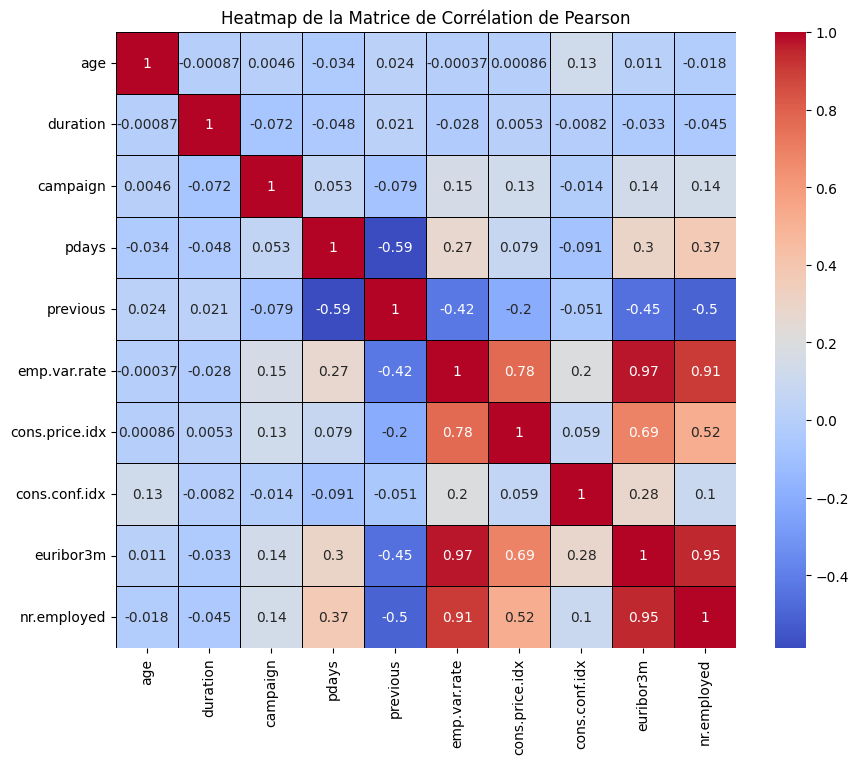

In [43]:
# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# Calculer la matrice de corrélation
correlation_matrix = df_numeric.corr()

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Heatmap de la Matrice de Corrélation de Pearson')
plt.show()

## Suite à l'analyse de corrélation, suppression des colonnes qui ont un taux de corrélation supérieure à 0.95

In [44]:
# Suppression des lignes où 'y' a des valeurs NaN
df_filtered = df.dropna(subset=['y'])
df_filtered = df_filtered[df_filtered['marital'] != 'unknown']
#df_filtered = df_filtered[df_filtered['housing'] != 'unknown']
df_filtered['education'] = df_filtered['education'].replace(['basic.4y', 'basic.6y', 'basic.9y'], 'basic.education')

In [45]:
num_bins = 5
# Create equal-width bins for ages 
df_filtered['age_group'] = pd.cut(df_filtered['age'], bins=num_bins, labels=[f'Group {i+1}' for i in range(num_bins)])

In [106]:
df["age"].max()

98

In [47]:
df_filtered['age_group'].value_counts(dropna=False)

age_group
Group 2    20096
Group 1    12979
Group 3     7416
Group 4      518
Group 5       99
Name: count, dtype: int64

In [48]:
#df_filtered.loc[df_filtered["age_group"] == "Group 1" ]["age"].value_counts(dropna=False).sort_values()

In [49]:
# removing age from df 
df_filtered = df_filtered.drop(columns=['age'])

In [50]:
df_filtered["contact"].value_counts(dropna=False) 

contact
cellular     26091
telephone    15017
Name: count, dtype: int64

In [51]:
variables_to_remove = ['euribor3m', 'nr.employed','emp.var.rate','contact', 'month','day_of_week','poutcome'] 

In [52]:
df_filtered = df_filtered.drop(variables_to_remove, axis=1)

In [53]:
# Removing columns with high correlation ( More than 0.95 ) 
num_columns = ['duration', 'campaign', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx'] 
cat_columns = ['job', 'marital', 'education', 'default', 'housing','loan', 'age_group'] 


In [ ]:
"""job: str
    marital: str
    education: str
    default: str
    housing: str
    loan: str
    age_group: str"""

In [100]:
df_filtered["education"].unique()

array(['basic.education', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

In [76]:
df_filtered.head(2) 

,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,y,age_group
0,housemaid,married,basic.education,no,no,no,261,1,999,0,93.994,-36.4,0,Group 3
1,services,married,high.school,unknown,no,no,149,1,999,0,93.994,-36.4,0,Group 3


In [75]:
df_filtered.iloc[0].to_json()

'{"job":"housemaid","marital":"married","education":"basic.education","default":"no","housing":"no","loan":"no","duration":261,"campaign":1,"pdays":999,"previous":0,"cons.price.idx":93.994,"cons.conf.idx":-36.4,"y":0,"age_group":"Group 3"}'

In [55]:
"""dans df_filtered: supprimer var to remove et dans pipeline, retirer la derniere etape drop_feature
ré-entrainé le modele avec la nouvelle pipeline avec mlflow
dans main.py charger la nouvelle pipeline (modele)
modifier class Data"""

'dans df_filtered: supprimer var to remove et dans pipeline, retirer la derniere etape drop_feature\nré-entrainé le modele avec la nouvelle pipeline avec mlflow\ndans main.py charger la nouvelle pipeline (modele)\nmodifier class Data'

In [56]:
"""Partie application
création du forms.py avec django avec liste déroulante avec 
envoie des données à l'api
return prédiction
afficher prediction"""

"Partie application\ncréation du forms.py avec django avec liste déroulante avec \nenvoie des données à l'api\nreturn prédiction\nafficher prediction"

In [57]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_columns),
        ('cat', OneHotEncoder(), cat_columns)
    ],
    remainder="passthrough" 
)

In [58]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()
df_filtered["y"] = label_encoder.fit_transform(df_filtered["y"])

In [59]:
# Réinitialiser les index
X = df_filtered.drop(columns=['y']).reset_index(drop=True)  # Features
y = df_filtered['y'].reset_index(drop=True)  # Target variable

# Division des données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Affichage des dimensions des ensembles d'entraînement et de test
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (32886, 13) (32886,)
Testing set shape: (8222, 13) (8222,)


In [60]:
# Vérification de l'absence de valeurs NaN dans les nouveaux ensembles
print("NaN dans y_train_clean:", y_train.isnull().sum())
print("NaN dans y_test_clean:", y_test.isnull().sum())

NaN dans y_train_clean: 0
NaN dans y_test_clean: 0


## Regression logistique

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression # Library
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model',LogisticRegression(C=10,random_state=42))
    ]
)

In [62]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['duration', 'campaign',
                                                   'pdays', 'previous',
                                                   'cons.price.idx',
                                                   'cons.conf.idx']),
                                                 ('cat', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan',
                                                   'age_group'])])),
                ('model', LogisticRegression(C=10, random_state=42))])

In [63]:
y_pred = pipeline.predict(X_test)

In [64]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7324
           1       0.63      0.34      0.44       898

    accuracy                           0.91      8222
   macro avg       0.78      0.66      0.70      8222
weighted avg       0.89      0.91      0.89      8222



In [65]:
print(recall_score(y_test, y_pred ))

0.33964365256124723


In [66]:
from sklearn.metrics import f1_score
# Calculer le F1 score moyen pour toutes les classes
f1 = f1_score(y_test, y_pred, average='macro')  # 'macro' ne prend pas en compte le déséquilibre des classes
print('F1 Score (Macro):', f1)


F1 Score (Macro): 0.6956520295061742


In [67]:
from sklearn.metrics import f1_score

# y_test est votre ensemble de données de test réel
# y_pred sont vos prédictions faites par le modèle de régression logistique
score_f1 = f1_score(y_test, y_pred, average='binary')  # Utilisez 'binary' si vous avez une classification binaire

print("F1 Score:", score_f1)


F1 Score: 0.4423495286439449


Le F1 score est défini comme 2 fois le produit de la précision et du rappel divisé par la somme de la précision et du rappel :
F1 = 2 * (Precision*Recall)/ (Precision + recall)


## Regression logisitic 

### experiment: experience = bank additionnal dans notre cas 
### Run: Au sein d'un experiment c'est ce qu'on va comparer pour tirer le test plus intéressant pour nous

/home/yanis/miniconda3/envs/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/yanis/miniconda3/envs/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/yanis/miniconda3/envs/venv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/yanis/miniconda3/envs/venv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/home/yanis/miniconda3/envs/venv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/home/yanis/miniconda3/

[ 2959  9619 16278 22937 29597]


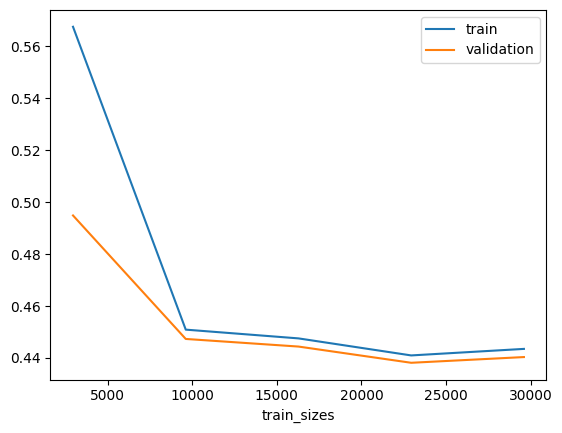

In [68]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

N, train_score, val_score = learning_curve(pipeline, X_train, y_train,cv=10, scoring="f1", random_state=42)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, pd.DataFrame(val_score).mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()

In [69]:
pipeline.named_steps["model"]

LogisticRegression(C=10, random_state=42)

In [70]:
model_estimator = pipeline.named_steps["model"]

column_names= pipeline[0].get_feature_names_out()
feature_importance = pd.Series(model_estimator.coef_[0], index=column_names)
plot_importances_df =\
        feature_importance\
        .nlargest(10)\
        .sort_values()\
        .to_frame('value')\
        .rename_axis('feature')\
        .reset_index()

import plotly.express as px
fig = px.bar(plot_importances_df, 
                x='value', 
                y='feature')
fig.update_layout(title_text="feature importance", title_x=0.5) 
fig.update(layout_showlegend=False)

fig.show()

In [71]:
#all_col = new_col + X_train.columns
column_names= pipeline[0].get_feature_names_out()
coefficients = pipeline.named_steps['model'].coef_[0]  # Accéder aux coefficients du modèle

# Créer un DataFrame pour une meilleure visualisation
feature_importance = pd.DataFrame(coefficients, 
                                  index=column_names, 
                                  columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)

print(feature_importance)


                                    Coefficient
num__duration                          1.109603
cat__age_group_Group 5                 1.081063
cat__job_student                       0.695317
cat__age_group_Group 4                 0.603267
cat__job_unemployed                    0.229001
cat__job_retired                       0.183306
num__previous                          0.118716
cat__education_illiterate              0.102771
num__cons.conf.idx                     0.036265
cat__job_admin.                        0.029301
cat__education_unknown                -0.004473
cat__default_yes                      -0.012416
cat__default_no                       -0.016861
cat__education_university.degree      -0.036228
cat__job_housemaid                    -0.072928
cat__marital_single                   -0.105923
cat__education_professional.course    -0.114858
cat__job_unknown                      -0.122553
cat__job_technician                   -0.176319
num__campaign                         -0

In [72]:
#pd.DataFrame(feature_importance)

2024/05/05 22:11:18 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/yanis/miniconda3/envs/venv/lib/python3.10/site-packages/mlflow/types/utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/05/05 22:11:20 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/yanis/miniconda3/envs/venv/lib

2024/05/05 22:11:30 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/yanis/miniconda3/envs/venv/lib/python3.10/site-packages/mlflow/types/utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/05/05 22:11:33 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/yanis/miniconda3/envs/venv/lib

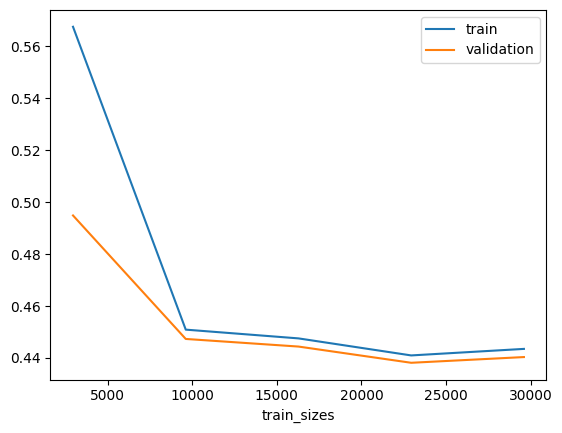

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import mlflow
from mlflow import sklearn as mlf_sklearn

# Activer l'enregistrement automatique
mlflow.sklearn.autolog(log_input_examples=False, log_model_signatures=True, log_models=True, log_datasets=False, disable=False, 
                       exclusive=False, disable_for_unsupported_versions=False, silent=False, max_tuning_runs=5, 
                       log_post_training_metrics=False, serialization_format='cloudpickle', registered_model_name=None, 
                       pos_label=None, extra_tags=None)

# Débuter une expérience MLflow
with mlflow.start_run(run_name="first_logistic_regression"):
    # Entraîner le modèle (cela déclenche autolog pour enregistrer le modèle et les métriques automatiquement)
    pipeline.fit(X_train, y_train)

    # Prédictions sur l'ensemble de test
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # probabilités pour la classe positive

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    mlflow.log_metric("test_accuracy", accuracy )
    mlflow.log_metric("precision", precision )
    mlflow.log_metric("recall", recall )
    mlflow.log_metric("f1", f1 )
    mlflow.log_metric("roc_auc", roc_auc )

    N, train_score, val_score = learning_curve(pipeline, X_train, y_train,cv=10, scoring="f1", random_state=42)
    
    plt.plot(N, train_score.mean(axis=1), label='train')
    plt.plot(N, pd.DataFrame(val_score).mean(axis=1), label='validation')
    plt.xlabel('train_sizes')
    plt.legend()
    plt.savefig("learning_curve.png")
    
    coefficients = pipeline.named_steps['model'].coef_[0]  # Accéder aux coefficients du modèle

    new_col = pipeline['preprocessor'].transformers_[1][1]\
    .get_feature_names_out(cat_columns)
    all_col = list(num_columns) + list(new_col)

    # Créer un DataFrame pour une meilleure visualisation
    feature_importance = pd.DataFrame(coefficients, 
                                    index=all_col, 
                                    columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)
    
    feature_importance.to_html("feature_importance.html")


    # Vous pouvez toujours ajouter d'autres artefacts si nécessaire
    mlflow.log_artifact("learning_curve.png")
    mlflow.log_artifact("feature_importance.html")

# L'exécution est automatiquement clôturée avec le bloc 'with'


In [74]:
-----------

SyntaxError: invalid syntax (353815310.py, line 1)

### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rfc = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])


In [ ]:
pipeline_rfc.fit(X_train,y_train)

2024/05/04 09:52:25 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4293900c76a94e858a003a66e6da2231', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/05/04 09:52:32 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/yanis/miniconda3/envs/venv/lib/python3.10/site-packages/mlflow/types/utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With M

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['duration', 'campaign',
                                                   'pdays', 'previous',
                                                   'cons.price.idx',
                                                   'cons.conf.idx']),
                                                 ('cat', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan',
                                                   'age_group']),
                                                 ('drop_feature', 'drop',
                                                  ['euribor3m', 'nr.employed',
                                                   'emp.var.rate', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('model', RandomForestClassifier(random_state=42))])

2024/05/04 09:58:09 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/yanis/miniconda3/envs/venv/lib/python3.10/site-packages/mlflow/types/utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/05/04 09:58:11 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/yanis/miniconda3/envs/venv/lib

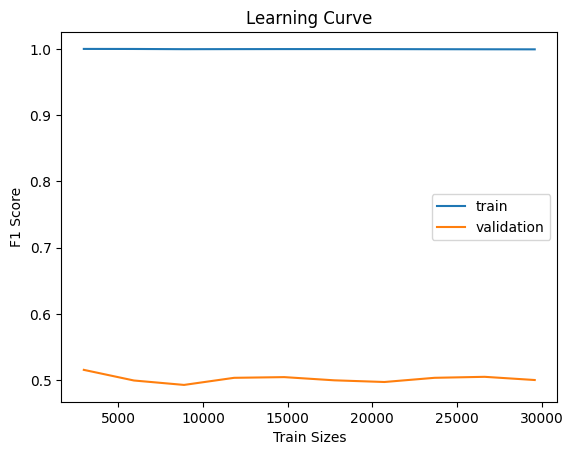

In [ ]:

# Configuration du pipeline avec Random Forest
pipeline_rfc = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Activer l'enregistrement automatique
mlflow.sklearn.autolog(log_input_examples=False, log_model_signatures=True, log_models=True, 
                       log_datasets=False, disable=False, exclusive=False, disable_for_unsupported_versions=False, 
                       silent=False, max_tuning_runs=5, log_post_training_metrics=False, 
                       serialization_format='cloudpickle', registered_model_name=None, 
                       pos_label=None, extra_tags=None)

# Débuter une expérience MLflow
with mlflow.start_run(run_name="random_forest_classification"):
    # Entraîner le modèle
    pipeline_rfc.fit(X_train, y_train)

    # Prédictions sur l'ensemble de test
    y_pred = pipeline_rfc.predict(X_test)
    y_pred_proba = pipeline_rfc.predict_proba(X_test)[:, 1]  # probabilités pour la classe positive

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    mlflow.log_metric("test_accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)
    mlflow.log_metric("roc_auc", roc_auc)

    # Learning Curve
    N, train_score, val_score = learning_curve(pipeline_rfc, X_train, y_train, cv=10, scoring="f1", train_sizes=np.linspace(0.1, 1.0, 10))
    plt.figure()
    plt.plot(N, train_score.mean(axis=1), label='train')
    plt.plot(N, pd.DataFrame(val_score).mean(axis=1), label='validation')
    plt.xlabel('Train Sizes')
    plt.ylabel('F1 Score')
    plt.title('Learning Curve')
    plt.legend()
    plt.savefig("learning_curve.png")

    # Feature Importance
    feature_importances = pipeline_rfc.named_steps['model'].feature_importances_
    new_col = pipeline_rfc['preprocessor'].transformers_[1][1].get_feature_names_out(cat_columns)
    all_col = list(num_columns) + list(new_col)
    feature_importance = pd.DataFrame(feature_importances, index=all_col, columns=['Importance']).sort_values(by='Importance', ascending=False)
    feature_importance.to_html("feature_importance.html")

    # Logging artifacts
    mlflow.log_artifact("learning_curve.png")
    mlflow.log_artifact("feature_importance.html")

# L'exécution est automatiquement clôturée avec le bloc 'with'


## SVM

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import learning_curve
import mlflow
from mlflow import sklearn as mlf_sklearn

# Configuration du pipeline avec SVM
pipeline_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # SVM bénéficie souvent de la mise à l'échelle des caractéristiques
    ('model', SVC(kernel='linear', probability=True, random_state=42))
])

# Activer l'enregistrement automatique
mlflow.sklearn.autolog(log_input_examples=False, log_model_signatures=True, log_models=True, 
                       log_datasets=False, disable=False, exclusive=False, disable_for_unsupported_versions=False, 
                       silent=False, max_tuning_runs=5, log_post_training_metrics=False, 
                       serialization_format='cloudpickle', registered_model_name=None, 
                       pos_label=None, extra_tags=None)

# Débuter une expérience MLflow
with mlflow.start_run(run_name="svm_classification"):
    # Entraîner le modèle
    pipeline_svm.fit(X_train, y_train)

    # Prédictions sur l'ensemble de test
    y_pred = pipeline_svm.predict(X_test)
    y_pred_proba = pipeline_svm.predict_proba(X_test)[:, 1]  # probabilités pour la classe positive

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    mlflow.log_metric("test_accuracy", accuracy)
    mlflow.log_metric("precision", precision) 
    mlflow.log_metric("recall", recall) 
    mlflow.log_metric("f1", f1) 
    mlflow.log_metric("roc_auc", roc_auc)

    # Learning Curve
    N, train_score, val_score = learning_curve(pipeline_svm, X_train, y_train, cv=10, scoring="f1", train_sizes=np.linspace(0.1, 1.0, 10))
    plt.figure()
    plt.plot(N, train_score.mean(axis=1), label='train')
    plt.plot(N, pd.DataFrame(val_score).mean(axis=1), label='validation')
    plt.xlabel('Train Sizes')
    plt.ylabel('F1 Score')
    plt.title('Learning Curve')
    plt.legend()
    plt.savefig("learning_curve.png")
    mlflow.log_artifact("learning_curve.png")

# L'exécution est automatiquement clôturée avec le bloc 'with'


2024/05/04 10:50:38 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/yanis/miniconda3/envs/venv/lib/python3.10/site-packages/mlflow/types/utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


In [ ]:
"""import pickle

# Enregistrez le modèle dans un fichier .pickle après l'avoir entraîné
with open("/home/yanis/Téléchargements/Projet chef d'oeuvre/api_ai/modele/logistic_regression.pickle", 'wb') as file:
    pickle.dump(model, file)
"""

'import pickle\n\n# Enregistrez le modèle dans un fichier .pickle après l\'avoir entraîné\nwith open("/home/yanis/Téléchargements/Projet chef d\'oeuvre/api_ai/modele/logistic_regression.pickle", \'wb\') as file:\n    pickle.dump(model, file)\n'

In [ ]:
"""data_example = {
    'duration': [200], 
    'campaign': [2], 
    'pdays': [999], 
    'previous': [0], 
    'cons.price.idx': [93.994], 
    'cons.conf.idx': [-36.4], 
    # Encodage One-Hot pour 'job'
    'job_admin.': [1], 
    'job_blue-collar': [0], 
    'job_entrepreneur': [0], 
    'job_housemaid': [0], 
    'job_management': [0], 
    'job_retired': [0], 
    'job_self-employed': [0], 
    'job_services': [0], 
    'job_student': [0], 
    'job_technician': [0], 
    'job_unemployed': [0], 
    'job_unknown': [0], 
    # Encodage One-Hot pour 'marital'
    'marital_divorced': [0], 
    'marital_married': [1], 
    'marital_single': [0], 
    # Encodage One-Hot pour 'education'
    'education_basic.education': [1], 
    'education_high.school': [0], 
    'education_illiterate': [0], 
    'education_professional.course': [0], 
    'education_university.degree': [0], 
    'education_unknown': [0], 
    # Encodage One-Hot pour 'default'
    'default_no': [1], 
    'default_unknown': [0], 
    'default_yes': [0], 
    # Encodage One-Hot pour 'housing'
    'housing_no': [0], 
    'housing_yes': [1], 
    # Encodage One-Hot pour 'loan'
    'loan_no': [1], 
    'loan_yes': [0], 
    # Encodage One-Hot pour 'age_group'
    'age_group_Group 1': [0], 
    'age_group_Group 2': [1], 
    'age_group_Group 3': [0], 
    'age_group_Group 4': [0], 
    'age_group_Group 5': [0]
}

# Convertir le dictionnaire en DataFrame
df_example = pd.DataFrame(data_example)
"""

"data_example = {\n    'duration': [200], \n    'campaign': [2], \n    'pdays': [999], \n    'previous': [0], \n    'cons.price.idx': [93.994], \n    'cons.conf.idx': [-36.4], \n    # Encodage One-Hot pour 'job'\n    'job_admin.': [1], \n    'job_blue-collar': [0], \n    'job_entrepreneur': [0], \n    'job_housemaid': [0], \n    'job_management': [0], \n    'job_retired': [0], \n    'job_self-employed': [0], \n    'job_services': [0], \n    'job_student': [0], \n    'job_technician': [0], \n    'job_unemployed': [0], \n    'job_unknown': [0], \n    # Encodage One-Hot pour 'marital'\n    'marital_divorced': [0], \n    'marital_married': [1], \n    'marital_single': [0], \n    # Encodage One-Hot pour 'education'\n    'education_basic.education': [1], \n    'education_high.school': [0], \n    'education_illiterate': [0], \n    'education_professional.course': [0], \n    'education_university.degree': [0], \n    'education_unknown': [0], \n    # Encodage One-Hot pour 'default'\n    'defaul

In [ ]:
"""# Faire une prédiction avec l'exemple d'entrée
prediction = model.predict(df_example)

# Afficher le résultat de la prédiction
print("Résultat de la prédiction :", prediction)"""

Résultat de la prédiction : [0.]
